In [37]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [38]:
%cd 

C:\Users\Robin G


# Importing the data

In [39]:
data = pd.read_excel("BankReviews.xlsx")

In [40]:
data.head(2)

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage


# Cleaning the data

In [41]:
#dropping irrelevant columns
data = data.drop(['Date','BankName'],axis = 1)
data

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...
...,...,...
500,1,\r\nI never write reviews but had to this time...
501,1,\r\nIt all started when Bob G ran a credit che...
502,1,\r\nWhat a horrible experience. We have excell...
503,1,"\r\nRep was extremely professional, friendly, ..."


In [42]:
#seperating X and Y
x=data.Reviews
y=data.Stars

In [43]:
x.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [44]:
y.head(2)

0    5
1    5
Name: Stars, dtype: int64

In [45]:
import re
corpus = []
for i in range(0, len(x)):
    review = re.sub(r'\W', ' ', str(x[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [53]:
lemmatizer = WordNetLemmatizer()

for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)


# Calculating TF-IDF

In [54]:
# Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
x = vectorizer.fit_transform(corpus).toarray()

In [55]:
data_new

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33245169,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12340384, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1137738 , 0.08430181,
        0.1272345 ]])

In [56]:
data.head(5)

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


# Splitting data in to train and test

In [57]:

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,
                                              y,
                                              test_size=.2,
                                              random_state=32)

# Logistics regression

In [58]:

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit( train_x, train_y )

C:\Users\Robin G\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#accuracy from logistics model
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,log.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,log.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8811881188118812
train_accuracy:  0.9405940594059405


Text(0.5, 15.0, 'Predicted value')

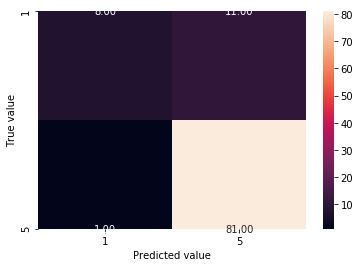

In [60]:
#confusion matrix for logistic model.

from sklearn import metrics

matrix = metrics.confusion_matrix(test_y,
                            log.predict(test_x), [1,5] )
matrix

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(matrix, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True value')
plt.xlabel('Predicted value')

# Support Vector Machine(SVM)

In [61]:
from sklearn.svm import SVC

In [62]:
svm=SVC()
svm.fit(train_x,train_y)

C:\Users\Robin G\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
test_accuracy=metrics.accuracy_score(test_y,svm.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,svm.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8118811881188119
train_accuracy:  0.8118811881188119


# Merging data for final prediction 

- AS logistics get higher accuracy. we predict using logistics model only.

In [64]:
#Concatenating final prediction with original data set(all obersvations):

pd_stars=pd.DataFrame(log.predict(x),columns=['pre_stars'])
  
file = pd.concat([data, pd_stars], axis=1)

file.head(100)

,Stars,Reviews,pre_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
...,...,...,...
95,1,\r\nI thought they seemed very nice at first. ...,1
96,1,\r\nThe experience with Reliance was extremely...,5
97,1,\r\nPerson with whom I spoke kept interrupting...,5
98,1,\r\nBased on results I have to give 1 star. My...,1
